# Propr Tutorials 


## Calculating Proportionality  

Avoid working with zeros if at all possible. 

In [3]:
library(propr)
set.seed(12345)
N <- 100
X <- data.frame(a=(1:N), b=(1:N) * rnorm(N, 10, 0.1),
                c=(N:1), d=(N:1) * rnorm(N, 10, 1.0))


Phi (ϕ) has a range of [0,∞). Lower values indicate more proportionality.


In [4]:
phi <- propr(X, metric = "phi", symmetrize = TRUE)
phi

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.



Not weighted and not alpha-transformed 
@counts summary: 100 subjects by 4 features
@logratio summary: 100 subjects by 4 features
@matrix summary: 4 features by 4 features
@pairs summary: index with `[` method
@fdr summary: iterations
See ?propr for object methods

@counts summary is the orginal N row by D column matrix. Where D is the features being looked at and N is the different samples.
@logratio is the orginal matrix log transformed
@matrix is the proportionality mertic 

In [5]:
phi@matrix

,a,b,c,d
a,0.0000000000,0.0001699506,4.0188916,3.9903638
b,0.0001699506,0.0000000000,4.0164918,3.9876983
c,4.0188915793,4.0164918065,0.0000000,0.0138053
d,3.9903637651,3.9876983027,0.0138053,0.0000000


ρ (rho) range from [−1,1] which great |ρ| indicating greater porpotionality.

In [6]:
rho <- propr(X, metric = "rho", ivar = 0)
rho@matrix

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.



,a,b,c,d
a,1.0000000,0.9999151,-0.9982060,-0.9982688
b,0.9999151,1.0000000,-0.9982822,-0.9981943
c,-0.9982060,-0.9982822,1.0000000,0.9930481
d,-0.9982688,-0.9981943,0.9930481,1.0000000


## Choosing a cutoff value
Want to choose the largets cutoff value that keeps the flase discovery rate below 0.05. The sequence assigned to the bariable cutoff indicates the values the test will be run on.

In [7]:
updateCutoffs(rho, cutoff =  seq(.05, .95, .3))

Alert: Try parallelizing updateCutoffs with ncores > 1.



|------------(25%)----------(50%)----------(75%)----------|


Not weighted and not alpha-transformed 
@counts summary: 100 subjects by 4 features
@logratio summary: 100 subjects by 4 features
@matrix summary: 4 features by 4 features
@pairs summary: index with `[` method
@fdr summary: iterations
  cutoff randcounts truecounts FDR
1   0.05          0          2   0
2   0.35          0          2   0
3   0.65          0          2   0
4   0.95          0          2   0
See ?propr for object methods

## Real data RNA-seq count data

Data set of transcipt counts for 20 toads sampled from two locations.
Are going to start by filtering out all transcripts that do not have at least 10 counts in 10 samples.

In [2]:
library(propr)
data(caneToad.counts)
data(caneToad.groups)
keep <- apply(caneToad.counts, 2, function(x) sum(x >= 10) >= 10)
rho <- propr(caneToad.counts, metric = "rho", select = keep)
show(rho)

Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Using 'select' disables permutation testing.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.



Not weighted and not alpha-transformed 
@counts summary: 20 subjects by 25774 features
@logratio summary: 20 subjects by 25774 features
@matrix summary: 25774 features by 25774 features
@pairs summary: index with `[` method
@fdr summary: iterations
See ?propr for object methods


Usually here would be when to use the function updateCutoff to choose a sorting parameter. However because the select variable was utilizaed in propr R, the function will not work on this type of object. Instead an arbitrarily high value will be assigned for the sake of the example. 

In [9]:
best <- rho[">", .995]
best

Not weighted and not alpha-transformed 
@counts summary: 20 subjects by 25774 features
@logratio summary: 20 subjects by 25774 features
@matrix summary: 25774 features by 25774 features
@pairs summary: 370 feature pairs
@fdr summary: iterations
See ?propr for object methods

Each row is a representation of 1 of 20 possible toads. The toads were sampled from one of two locations. Each column is a transcript that was measured, the hypothesis is there will be a change in abundance of some of these transcripts based on what locationm the sampled toad was from.

In [4]:
show(best@counts[1:10])

                c9958_g1_i1 c995_g1_i1 c9941_g1_i1 c9938_g1_i1 c9913_g1_i1
RM0010M_RSEMout          11          5          21           1          60
RM0021M_RSEMout          14         75          16           1          23
RM0034M_RSEMout           7         39          15           3          34
RM0039M_RSEMout          14         18          20           9          14
RM0045M_RSEMout           9         43          15           6          19
RM0061M_RSEMout           4         16          12           1          50
RM0082M_RSEMout           8        101          27           3          33
RM0087M_RSEMout          10         23          11          41          32
RM0092M_RSEMout           4         24          17           2          26
RM0094M_RSEMout           1         34          19          30          44
RM0106M_RSEMout           8          6          18          11          92
RM0108M_RSEMout          12         33          27          10          74
RM0118M_RSEMout          

This is the propotionality metrics, the matrix is symetrical.

In [5]:
best@matrix[1:10,1:10]

,c9958_g1_i1,c995_g1_i1,c9941_g1_i1,c9938_g1_i1,c9913_g1_i1,c9901_g1_i1,c9900_g1_i1,c9887_g1_i1,c9883_g1_i1,c9874_g1_i1
c9958_g1_i1,1.000000000,0.21225317,0.3938567,0.30614983,0.4527476,0.27512090,-0.29859908,-0.2208144,-0.005076539,-0.1932205
c995_g1_i1,0.212253171,1.00000000,-0.0485163,-0.01376679,-0.1595157,-0.01254335,-0.12908304,0.2611093,-0.011491556,-0.1270316
c9941_g1_i1,0.393856734,-0.04851630,1.0000000,0.17578641,0.5931437,0.31582178,-0.19047542,-0.5627279,0.153812942,-0.4603592
c9938_g1_i1,0.306149832,-0.01376679,0.1757864,1.00000000,0.3605435,0.08830605,-0.07022899,0.1248991,-0.095979001,-0.2650997
c9913_g1_i1,0.452747615,-0.15951573,0.5931437,0.36054350,1.0000000,0.13892356,-0.17800657,-0.2968316,-0.262236669,-0.3999678
c9901_g1_i1,0.275120901,-0.01254335,0.3158218,0.08830605,0.1389236,1.00000000,-0.21582975,-0.1876974,0.280485880,-0.0170389
c9900_g1_i1,-0.298599082,-0.12908304,-0.1904754,-0.07022899,-0.1780066,-0.21582975,1.00000000,0.3249526,0.204929271,0.4784613
c9887_g1_i1,-0.220814351,0.26110930,-0.5627279,0.12489909,-0.2968316,-0.18769739,0.32495264,1.0000000,-0.206695679,0.1628957
c9883_g1_i1,-0.005076539,-0.01149156,0.1538129,-0.09597900,-0.2622367,0.28048588,0.20492927,-0.2066957,1.000000000,0.3032527
c9874_g1_i1,-0.193220511,-0.12703155,-0.4603592,-0.26509972,-0.3999678,-0.01703890,0.47846133,0.1628957,0.303252678,1.0000000


@pairs is a vector where each number is an index to a location on the matrix where the proportional metric meets the criteria specified when creating the object (in this example 0.995). 
From what I understand any feature that is a member of a pair that meets said criteria gets included has to be included in the object as a whole. Therefor because the matrix displays the relathionship between all features included in the object some of these relathionships will still not meet the criteria. Pairs represents exactly which of the relathionships represented in the matrix that should be focused on. 

In [6]:
best@pairs

[1]  49024052  52426355  52426357  52529453  55751327  57761777  58122627
  [8]  58870102  61344502  62091977  63767352  64669479  65880902  65880904
 [15]  65906678  67504728  67530502  73097902  77247678  77273453  77995152
 [22]  79000377  86036952  90418704  90418706  90418710  90418711  90444477
 [29]  90496033  90547580  90728004  90728005  90728007  90753781  90805327
 [36]  90831103  91037304  91501252  93021977  93537478  93537479  93589027
 [43]  93846777  94542702  96836677 100058552 100651377 100651378 100677152
 [50] 101708153 101708154 101708155 101759703 105857927 107430202 113693527
 [57] 113693528 113693529 113719302 113745077 114054379 114054384 114080156
 [64] 114105928 114131706 114363677 115575102 115575103 115575104 115600877
 [71] 115600878 115626652 117456677 117456678 122457027 123848877 127766677
 [78] 127766679 127792453 127947102 130808128 137664280 137664284 137690054
 [85] 137690058 137767380 138231327 138231328 141169677 149108377 151170377
 [92] 153335479 154082952 156505802 167305528 167305529 167305530 167305531
 [99] 167305532 167331302 167331303 167331304 167331305 167331307 167357077
[106] 167357078 167357079 167357080 167357081 167382852 167382853 167382855
[113] 167408627 167408629 167434402 175862827 177151577 178208353 180888954
[120] 180940502 192642355 192642356 192693903 192745452 196560155 196560156
[127] 196611702 196637477 196663253 196689027 196740577 196817903 196817904
[134] 197539602 197539603 197539604 197539605 197539606 197565377 197565378
[141] 197565380 197565381 197591152 197591153 197591154 197591155 197616927
[148] 197616928 197668477 197900453 197926227 199859352 201173877 201792477
[155] 201844028 206612402 211406552 211535430 211535432 211561204 211638528
[162] 214241802 215375905 227619028 227619029 227619030 227670577 227670578
[169] 227696352 232129652 233882352 237284652 237284653 237310427 241511752
[176] 243831502 250636103 257311840 264167978 264167980 264219528 266616602
[183] 266616604 266642378 266668152 267982677 267982678 268008452 271127229
[190] 271256102 272415978 272441752 273446979 273446982 273472752 273575852
[197] 286025177 290071853 292881329 292881333 292932877 292932878 292932879
[204] 292932880 292932882 292932883 292932886 292958655 292958656 292984427
[211] 292984428 292984430 292984434 293010202 293010204 293010205 293010208
[218] 293035978 293035979 293035982 293087527 293087530 293113304 297263077
[225] 297263337 297289111 297649702 300665377 301309752 301335527 301412855
[232] 303990355 305691502 305691503 305691504 305717277 305717278 305717279
[239] 305743052 305743053 305768827 306490527 311903278 311903279 311903282
[246] 311929055 311954827 311954830 311980604 312006377 312006381 324378377
[253] 326388827 327342503 357086852 357086853 357086854 357112627 357112628
[260] 357138402 364948227 367345303 369768152 369922984 369948578 370025902
[267] 371495077 371495078 371495080 371520852 371520853 371520854 371546627
[274] 371546628 371572402 371830153 371855927 374510752 374510755 374510756
[281] 374536529 374536530 374588077 374596518 374613852 378248127 378248130
[288] 378248131 378273904 378273905 378325452 386728102 386831205 388790105
[295] 396986554 403533402 408585303 409255452 409255453 409255454 409281227
[302] 409281228 409307002 409667852 409667853 409667854 409667855 409667856
[309] 409693627 409693628 409693629 409693630 409719402 409719404 409745177
[316] 409745178 409770952 416111602 416369352 416369353 416369354 416369355
[323] 416395127 416395128 416395129 416420902 416420903 416446677 420416027
[330] 423586352 432530277 437453303 437814152 450469678 459542477 459542480
[337] 459568254 459594027 459594028 463022102 480265577 480295689 496478052
[344] 498823577 509082027 511659528 511685302 516221703 516221704 516247479
[351] 516273253 517149602 526480152 548955952 548981727 554884202 556069852
[358] 572900927 586719207 592103302 592103303 592129077 596407727 602696827
[365] 629373952 634967127 641282002 641282472 6413

For the sake of comparision I will create two more datasets that have the cutoff at lower values to demonstrate how less proportional relathionships a represented visually. Note: Because the criteria for inclusion is lower, the size of the objects are much larger causing the figures to take longer to render. Therefor their code will be stored in a seperate code book than the "best" version to allow for skipping if they are not requirred. 

In [7]:
worst85 <- rho[">", .85]
worst95 <- rho[">", .95]

These next two function focus on visulization of indexed pairs (@pairs) only, not the data set as a whole.

Plot checks pairwise distribution of proportional pairs. A smear of straight diagonal lines confirms that the pairs are proportional. As one transcript increases in log-ratio transformed abundance so does the other.

Alert: Generating plot using indexed feature pairs.



|------------(25%)----------(50%)----------(75%)----------|


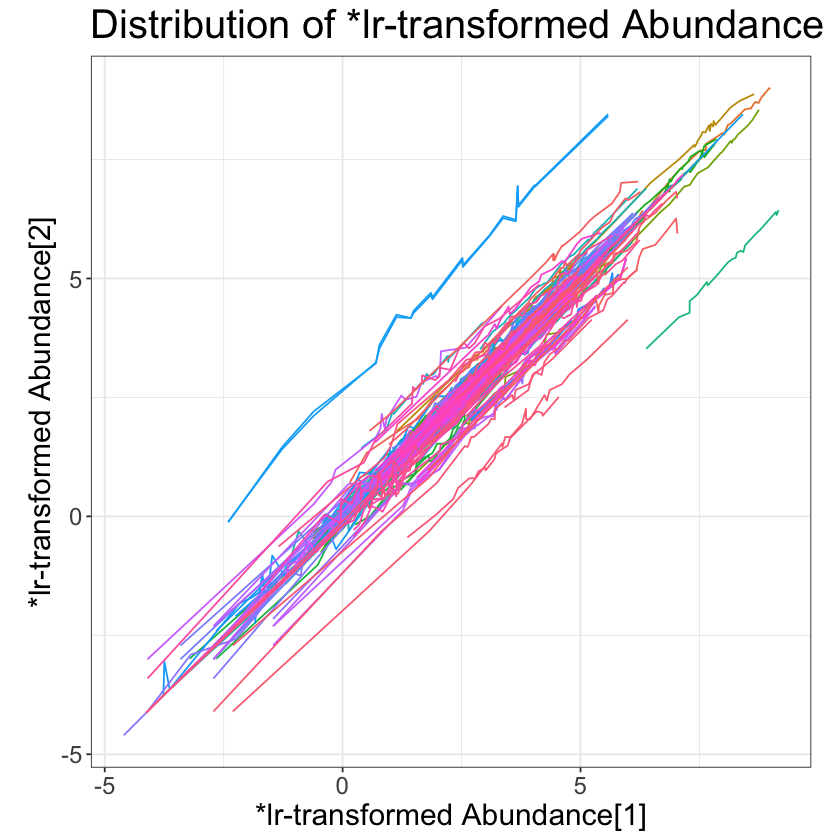

In [8]:
plot(best)

In [ ]:
plot(worst85)

In [ ]:
plot(worst95)

Dendrogram clusters the features based on a hierarchical clustering of the proportionality matrix. I believe dendrogram are a type of figure we could look into further how to interpret. 

In [ ]:
dendrogram(best)

In [ ]:
dendrogram(worst85)

In [ ]:
dendrogram(worst95)

Remaining methods do not restrict plotting to indexed pairs, but instead incorporate all features included into the propr object. The tutorial recommends to simplify the index pairs. The function simplifysubsets an entire propr object based on the index saved in its @pairs slot. Simplify returns an object with the @pairs slot updated. (Honestly I cant figure out the difference between the before and after of this function but figure it cant hurt to use it).

In [ ]:
bestSimp <- simplify(best)

Creates a PCA using the log ratio tranformed data. This is an example of the fact that now that we have access to LRT values we can once again apply standard staistical techniques to proprtional data.

In [ ]:
pca(bestSimp, group = caneToad.groups)

Visulization of the intensity of said LRT data. I suspect this also may be a generic figure type that further information could be found on how to interperate.

In [ ]:
snapshot(bestSimp)

Next two figures both deal with co-clustering based on proportinal features. They identify pairs that co cluster and store these clusters as a vector. K is defined as the number of co-clusters (where all pairs receive a specified color if and only if both members belong to same the cluster). 

Prism specifically plots the variance of the ratio of the log-ratio transformed feature pair (VLR) versus the sum of the individual variances of each log-ratio transformed feature (VLS). The ratio of the VLR to the VLS equals 1− rho (Maybe. Need to confirm this.) A low VLR with a high VLS suggests that the feature pair remains in an equilibrium despite high variability among the individual features. IE. Even though these two features show large variablities amoung the samples their relathionship to each other remains the same. (I think)

Blokeh plots pairs across the individual variances of the constituent log-ratio transformed features. (I believe this means that x coordinat is the variance of one member of the pair and y coordinat of the other). Highly variable co-clusters appear in the top-right of the figure while the lowly variable co-clusters appear in the bottom-left. 

In [ ]:
clustsPrism <- prism(bestSimp, k = 5)

In [ ]:
clustsBokeh <- bokeh(bestSimp, k = 5)

In the tutorial these two plots were used to indetify co-cluster two as a cluster of intrest for further analysis as it shows high proportionality in the setting of high individual feature variance. (I believe what this statement is saying is even though over the entire study there is a lot of variance in the cluster there always remains a strong proportional relathionship among the pairs. This makes these features good candidates for features that change in accordance with location changes. 

In order to isolate the features of co-cluster two use subset. Than use a PCA to see how they cluster based on location. 

In [ ]:
sub <- subset(bestSimp, select = (clusts == 2))
pca(sub, group = caneToad.groups)

Finally if statisfied with the seperation extract names of features of interest for further research. 

In [ ]:
transcripts <- colnames(sub@logratio)